In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/content/Diwali Sales Data.csv", encoding_errors = "ignore")

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraPradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# Dropping null columns
data.drop(["Status","unnamed1"], axis=1, inplace=True)

In [14]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
data.shape

(11251, 13)

In [16]:
# Dropped all null value rows from dataset
data.dropna(inplace=True)

In [17]:
data.shape

(11239, 13)

In [18]:
# changing the data type of amount column.
data["Amount"] = data["Amount"].astype(int)

In [19]:
data["Amount"].dtypes

dtype('int64')

In [21]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## **Exploratory Data Analysis**

**Gender**

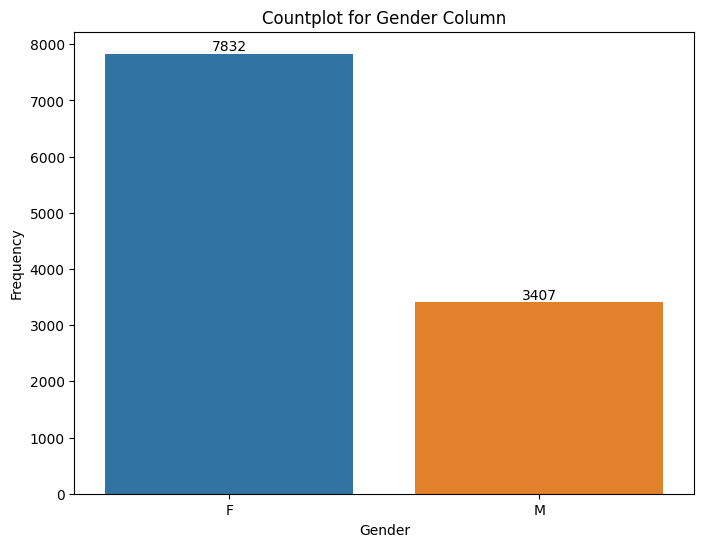

In [26]:
plt.figure(figsize=[8,6])
ax = sns.countplot(x = "Gender", data = data)

for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Countplot for Gender Column")
plt.xlabel("Gender")
plt.ylabel("Frequency")

plt.show()

<Axes: xlabel='Gender', ylabel='Amount'>

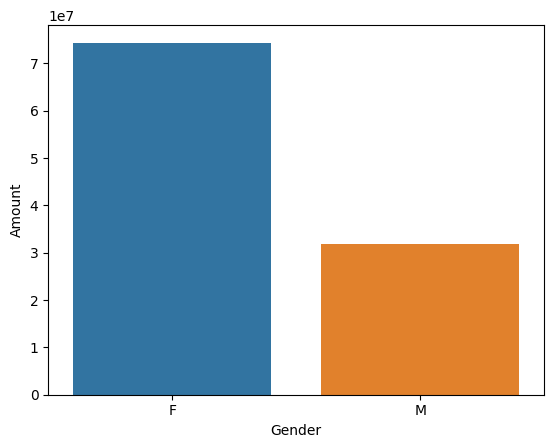

In [30]:
sales_data = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Gender', y='Amount', data=sales_data)

### **Observation**


* From above graphs we can see that most of the buyers are females and even the purchasing power of females is greater than males.



**Age group**

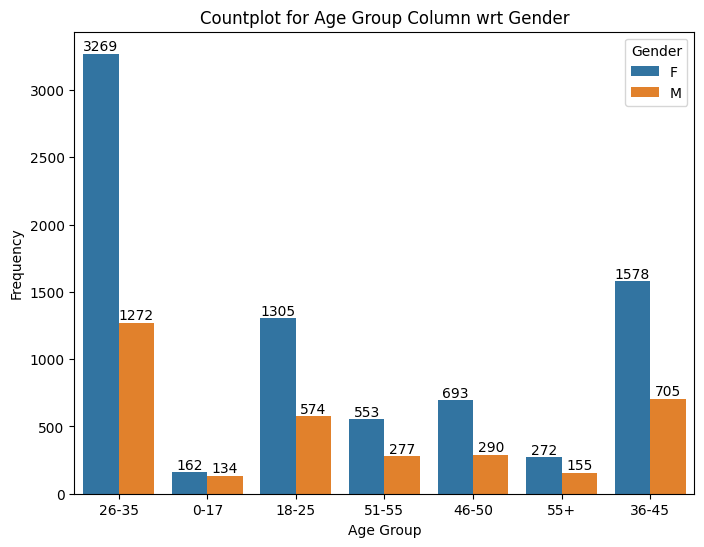

In [34]:
plt.figure(figsize=[8,6])
ax = sns.countplot(data=data, x='Age Group', hue='Gender')

for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Countplot for Age Group Column wrt Gender")
plt.xlabel("Age Group")
plt.ylabel("Frequency")

plt.show()

<Axes: xlabel='Age Group', ylabel='Amount'>

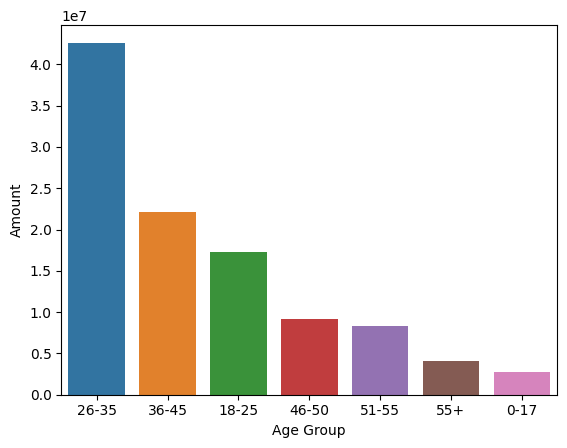

In [40]:
sales_age = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age )

### **Observation**


* From above graphs we can see that most of the buyers are from age group of 26-35, and in that too females are majority of buyers compared to males.



**States**

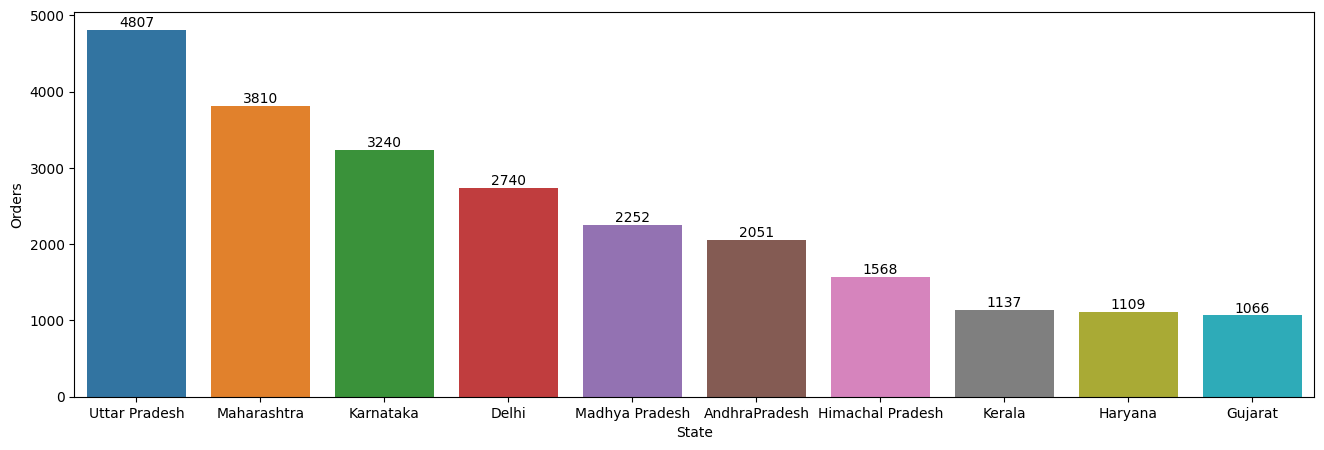

In [44]:
# To check top 10 states with most number of orders.
sales_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=[16,5])
ax = sns.barplot(data=sales_state, x='State', y='Orders')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Amount'>

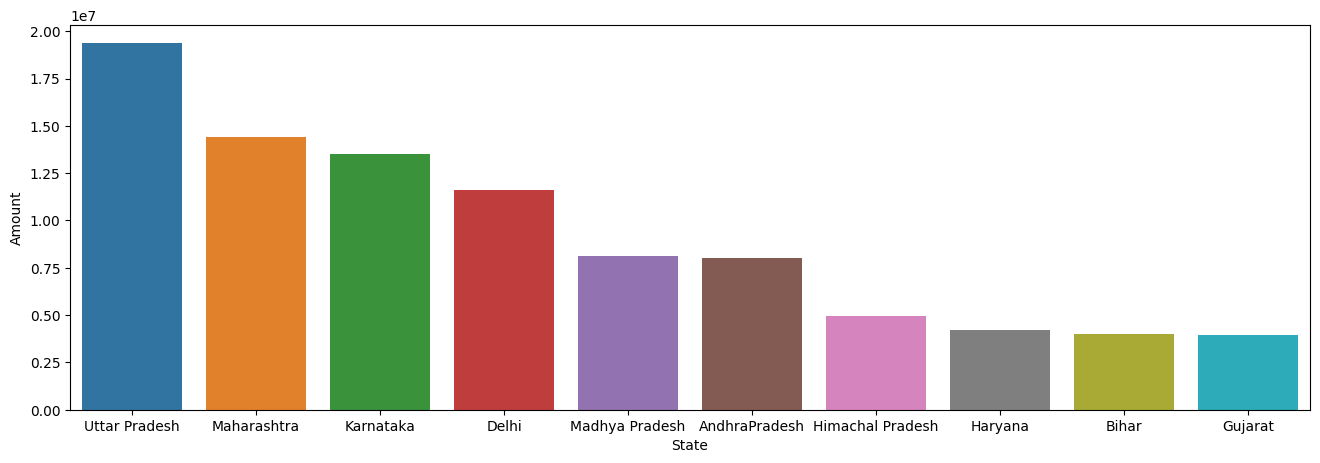

In [48]:
# To check top 10 states with most purchasing power.
sales_state = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=[16,5])
sns.barplot(data=sales_state, x='State', y='Amount')

### **Observations**

* From above graphs we can see that most number of orders and total sales are from Uttar Pradesh, Maharashtra, Karnataka respectively.

**Marital Status**

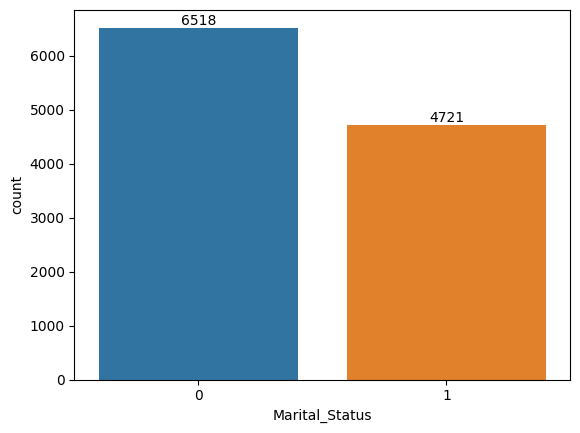

<Figure size 1000x800 with 0 Axes>

In [49]:
ax = sns.countplot(data=data, x='Marital_Status')

plt.figure(figsize=[10,8])
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

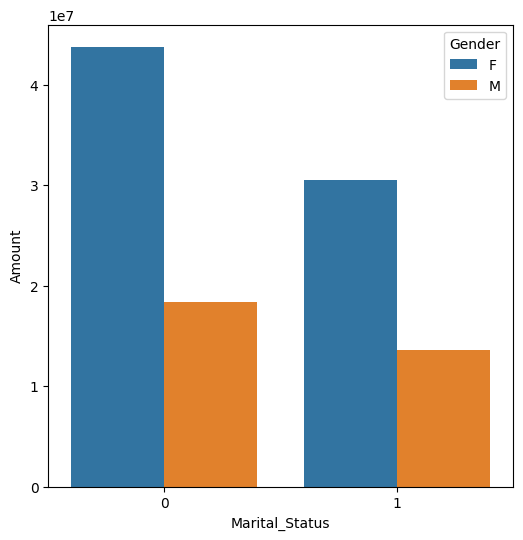

In [53]:
married_status = data.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=[6,6])
sns.barplot(data=married_status, x='Marital_Status', y='Amount', hue='Gender')

### **Observation**

- From above graphs we can see that most of the buyers are married(woman) and they high purchasing power.

**Occupation**

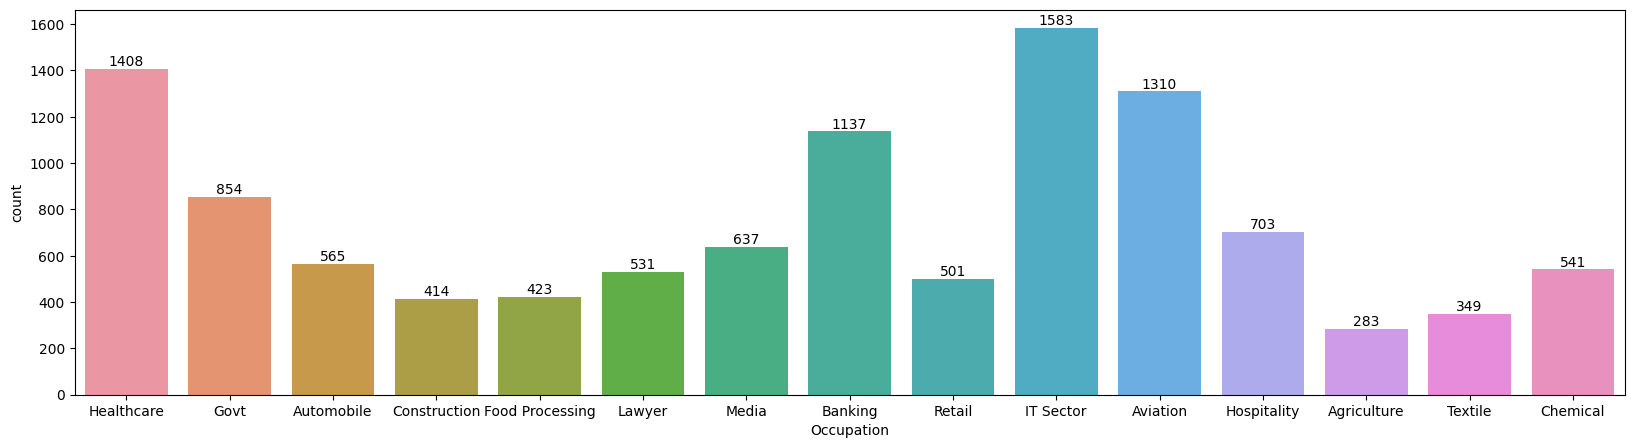

In [62]:
plt.figure(figsize=[20,5])
ax = sns.countplot(data=data, x='Occupation')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

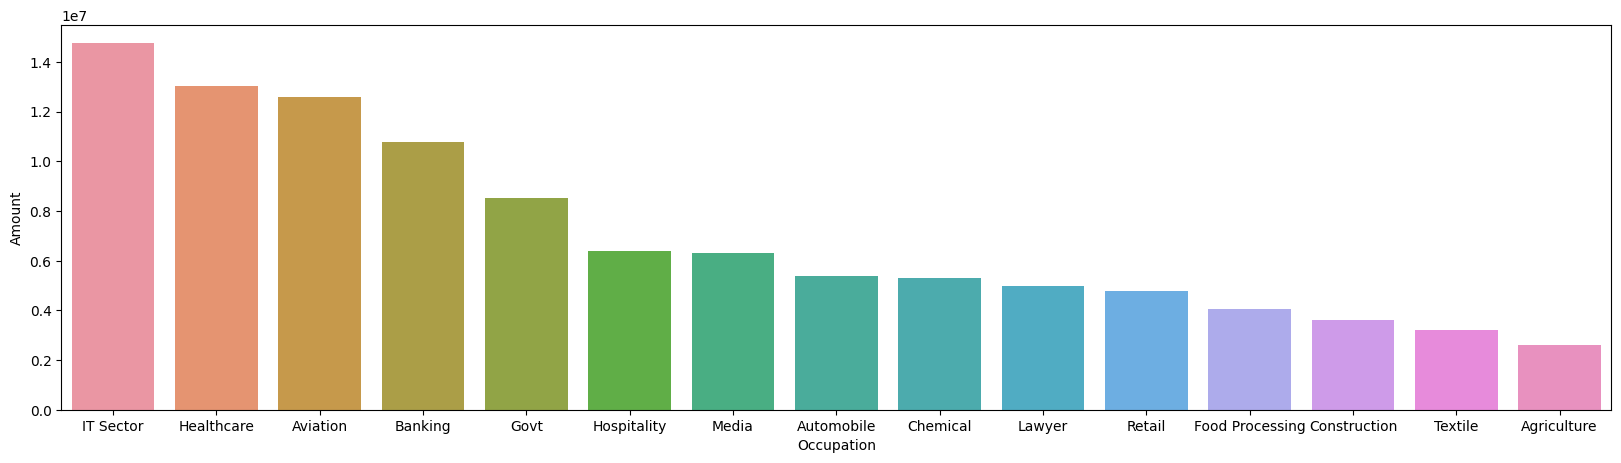

In [65]:
sales_occup = data.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=[20,5])
sns.barplot(data=sales_occup, x='Occupation', y='Amount')

### **Observation**

- From above graphs we can see that most of the buyers are working in IT sector, Healthcare, Aviation respectively an people in IT sector have high purchasing power.

**Product Category**

In [66]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

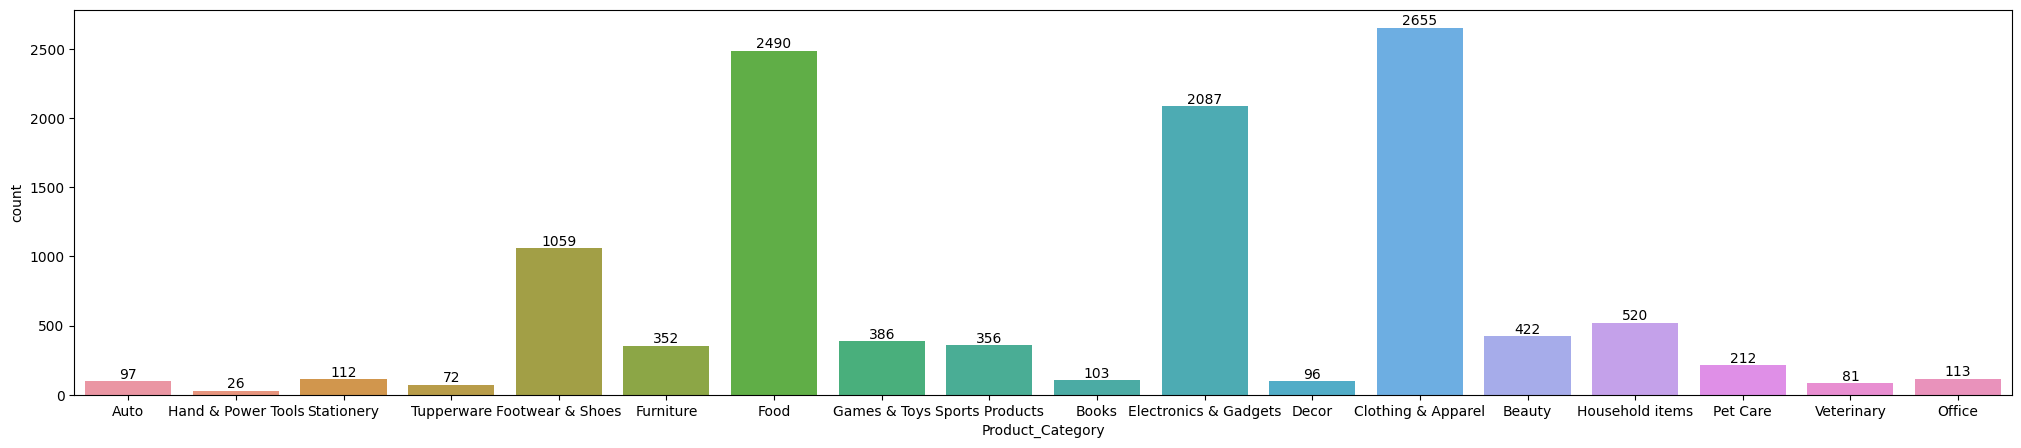

In [69]:
plt.figure(figsize=[25,5])
ax = sns.countplot(data=data, x='Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

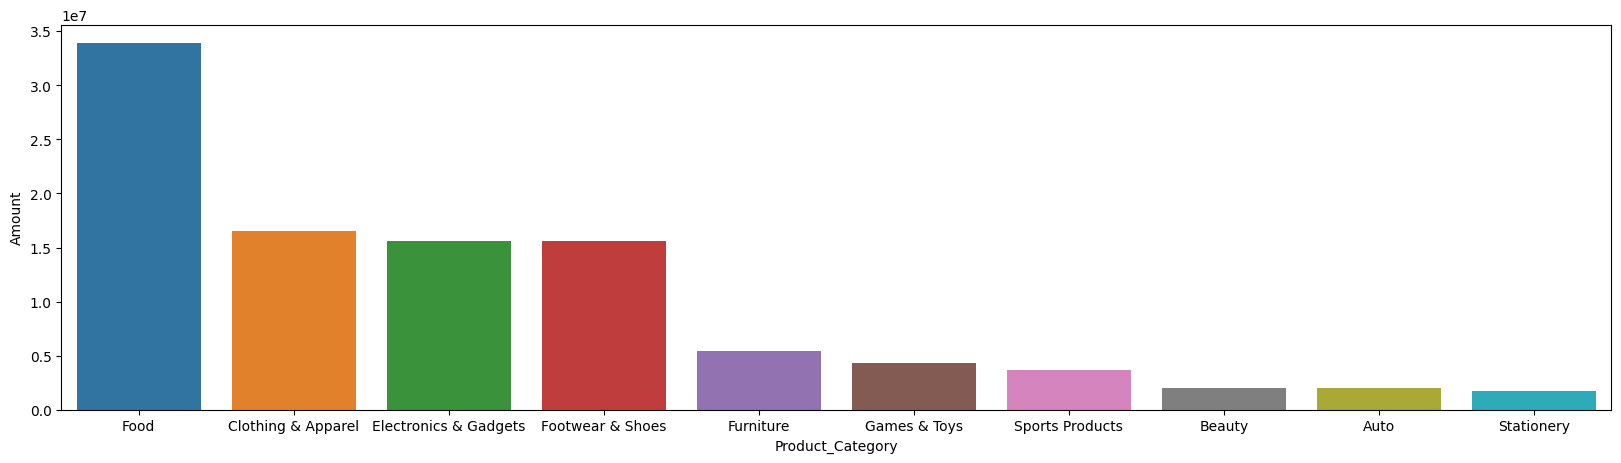

In [77]:
sales_product = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=[20,5])
sns.barplot(data=sales_product, x='Product_Category', y='Amount')

**Observation**

- From above graphs we can see that most of purchases/sales are made in Clothing & Apparel, Food and Electronics & Gadgets product category respectively.
- But most of the revenue was generated from Food, Clothing & Apparel and Electronics & Gadgets respectively.

## **Conclusion:**

* Married Woman from age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT sector, Healthcare, Aviation are most likely to buy products from Food, Clothing and Electronics Category.